### The purpose of this script is to post-process the arxiv leaderboard extracted from the arxiv filtering and LLM extraction. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# get leaderboard
df = pd.read_csv("../data/processed/leaderboard.csv")
df.head()

# remove samples outside of Computer Vision Domain and Metric above 0.7
df = df.query("Domain == 'Computer Vision' and Metric > 0.7")

In [3]:
df

,Paper Title,Application,Domain,Pipeline Stage,Strategy,Metric,Evidence,Dataset Mentioned
0,Inherently Faithful Attention Maps For Vision ...,General,Computer Vision,Post-Hoc Methods,Ifam With Test-Time Interventions,0.9740,Table 1. (A) Results On Metashift And Waterbir...,True
1,On Feature Learning In The Presence Of Spuriou...,General,Computer Vision,Post-Hoc Methods,Convnext Large + Erm + Dfr,0.9720,"In Particular, The Convnext Large Model Pretra...",True
2,Agro: Adversarial Discovery Of Error-Prone Gro...,General,Computer Vision,Representation Learning,Agro,0.9610,"Table 2, Waterbirds Section, Kwg2:Landbirds-Wa...",True
3,Intermediate Layer Classifiers For Ood General...,General,Computer Vision,Representation Learning,Intermediate Layer Classifiers (Ilcs),0.9590,Figure 3: Information Content For Ood Generali...,True
4,Texplain: Explaining Learned Visual Features V...,General,Computer Vision,Post-Hoc Methods,Texplain,0.9563,Table 2: Classification Results From The Water...,True
...,...,...,...,...,...,...,...,...
94,Ace And Diverse Generalization Via Selective D...,General,Computer Vision,Representation Learning,Ace,0.7560,"Table 1, 'Concept Labels (Y, Y')' Section, 'Wo...",True
95,Perceptual Grouping In Contrastive Vision-Lang...,General,Computer Vision,Representation Learning,Clippy,0.7490,Figure 4 (Centre Table) Shows The Accuracy On ...,True
96,The Rich And The Simple: On The Implicit Bias ...,General,Computer Vision,Representation Learning,Sgd,0.7435,Table 13: Comparison Of Average And Worst-Grou...,True
98,Maskmedpaint: Masked Medical Image Inpainting ...,General,Computer Vision,Representation Learning,Lads*,0.7320,Table 7: Performance Metrics Evaluated Across ...,True


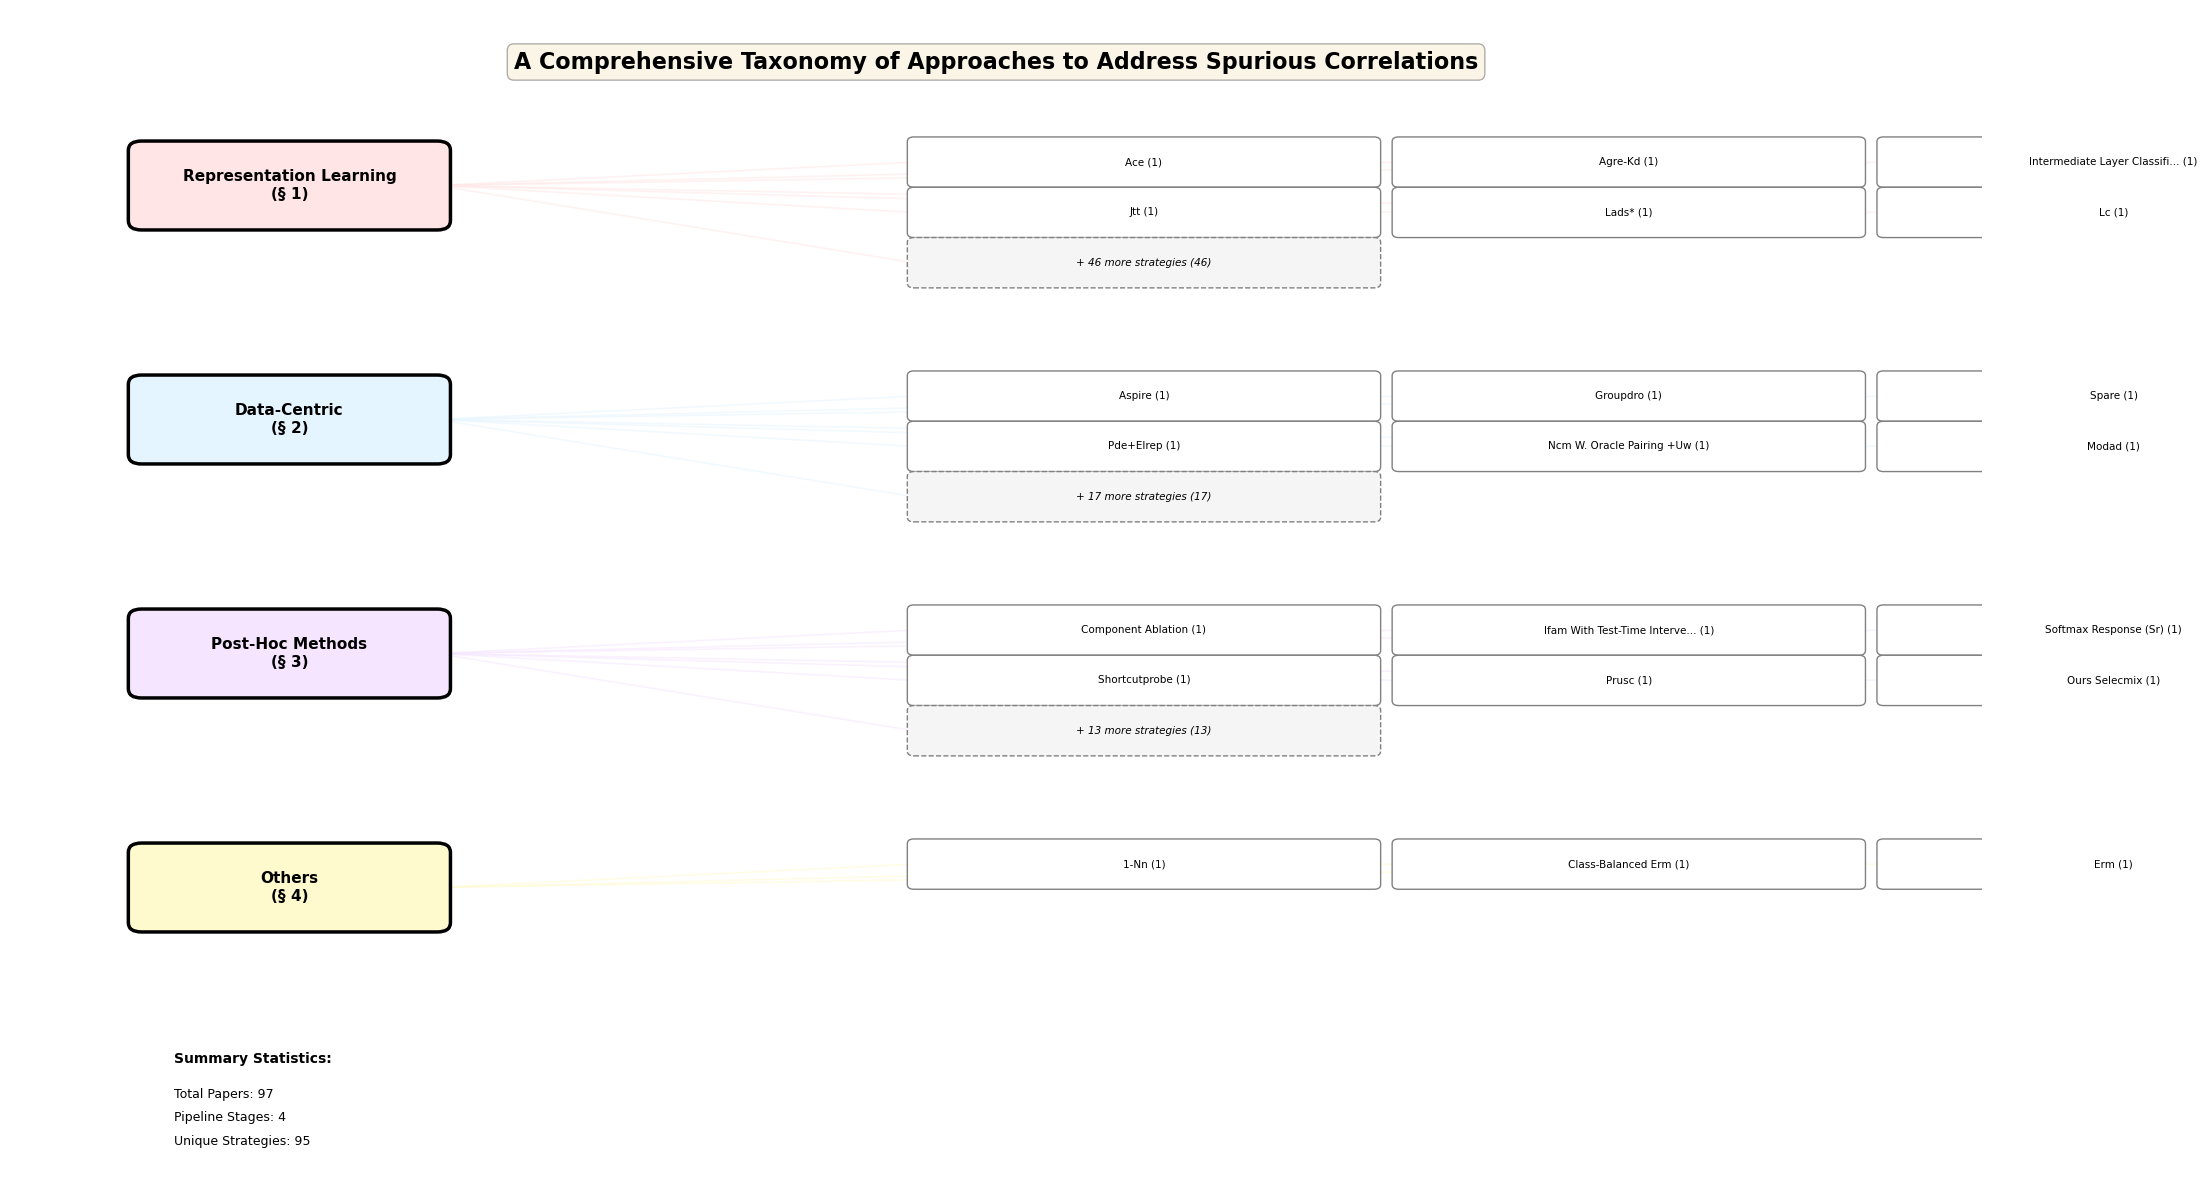


TAXONOMY OVERVIEW

Representation Learning: 52 papers, 52 strategies
  Top strategies:
    - Ace: 1 papers
    - Agre-Kd: 1 papers
    - Agro: 1 papers

Data-Centric: 23 papers, 23 strategies
  Top strategies:
    - Aspire: 1 papers
    - Ccdb: 1 papers
    - Cobaltig: 1 papers

Post-Hoc Methods: 19 papers, 19 strategies
  Top strategies:
    - Component Ablation: 1 papers
    - Convnext Large + Erm + Dfr: 1 papers
    - Cosmos (Clusters): 1 papers

Others: 3 papers, 3 strategies
  Top strategies:
    - 1-Nn: 1 papers
    - Class-Balanced Erm: 1 papers
    - Erm: 1 papers


In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, ConnectionPatch
import numpy as np

# Prepare hierarchical data - group strategies by Pipeline Stage
hierarchy_df = df.groupby(['Pipeline Stage', 'Strategy']).size().reset_index(name='count')

# Create a cleaner, more compact layout
fig, ax = plt.subplots(figsize=(22, 12))
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis('off')

# Define colors
colors = {
    'Representation Learning': '#FFE5E5',
    'Data-Centric': '#E5F5FF', 
    'Post-Hoc Methods': '#F5E5FF',
    'Others': '#FFFACD'
}

# Title
ax.text(6, 9.5, 'A Comprehensive Taxonomy of Approaches to Address Spurious Correlations', 
        fontsize=16, weight='bold', ha='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# Column positions
col_stage = 1.5
col_strategies = 5.5

# Get sorted pipeline stages by count
pipeline_counts = df.groupby('Pipeline Stage').size().sort_values(ascending=False)
sorted_stages = list(pipeline_counts.index)

# Calculate layout
y_pos = 8.5
row_height = 2.0

for stage_idx, stage_name in enumerate(sorted_stages):
    stage_color = colors.get(stage_name, '#F0F0F0')
    
    # Get strategies for this stage
    stage_strategies = hierarchy_df[hierarchy_df['Pipeline Stage'] == stage_name].sort_values('count', ascending=False)
    total_papers = stage_strategies['count'].sum()
    
    # Draw Pipeline Stage box
    stage_box = FancyBboxPatch((col_stage - 0.7, y_pos - 0.3), 1.8, 0.6,
                               boxstyle="round,pad=0.08", 
                               edgecolor='black', facecolor=stage_color,
                               linewidth=2.5, zorder=3)
    ax.add_patch(stage_box)
    ax.text(col_stage + 0.2, y_pos, f'{stage_name}\n(§ {stage_idx+1})',
            fontsize=11, weight='bold', ha='center', va='center', zorder=4)
    
    # Draw strategies in a grid layout (multiple columns if needed)
    strategies_per_row = 3
    strategy_width = 2.8
    strategy_height = 0.35
    h_spacing = 0.15
    v_spacing = 0.08
    
    # Group strategies: show top N individually, group rest as "Others"
    max_individual = 6
    top_strategies = stage_strategies.head(max_individual)
    
    for idx, (_, row) in enumerate(top_strategies.iterrows()):
        strategy = row['Strategy']
        count = row['count']
        
        # Calculate position in grid
        row_idx = idx // strategies_per_row
        col_idx = idx % strategies_per_row
        
        x = col_strategies + col_idx * (strategy_width + h_spacing)
        y = y_pos + 0.2 - row_idx * (strategy_height + v_spacing)
        
        # Draw strategy box
        strat_box = FancyBboxPatch((x, y - strategy_height/2), strategy_width, strategy_height,
                                   boxstyle="round,pad=0.04",
                                   edgecolor='gray', facecolor='white',
                                   linewidth=1, zorder=2)
        ax.add_patch(strat_box)
        
        # Truncate long strategy names
        display_name = strategy if len(strategy) <= 30 else strategy[:27] + '...'
        ax.text(x + strategy_width/2, y, f'{display_name} ({count})',
                fontsize=7.5, ha='center', va='center', zorder=3)
        
        # Draw connection line
        connection = ConnectionPatch((col_stage + 1.1, y_pos), (x, y),
                                    "data", "data",
                                    arrowstyle="-", linewidth=1.2,
                                    color=stage_color, alpha=0.5, zorder=1)
        ax.add_artist(connection)
    
    # If there are more strategies, add a summary box
    if len(stage_strategies) > max_individual:
        remaining = len(stage_strategies) - max_individual
        remaining_count = stage_strategies.iloc[max_individual:]['count'].sum()
        
        idx = max_individual
        row_idx = idx // strategies_per_row
        col_idx = idx % strategies_per_row
        
        x = col_strategies + col_idx * (strategy_width + h_spacing)
        y = y_pos + 0.2 - row_idx * (strategy_height + v_spacing)
        
        strat_box = FancyBboxPatch((x, y - strategy_height/2), strategy_width, strategy_height,
                                   boxstyle="round,pad=0.04",
                                   edgecolor='gray', facecolor='#F5F5F5',
                                   linewidth=1, linestyle='--', zorder=2)
        ax.add_patch(strat_box)
        ax.text(x + strategy_width/2, y, f'+ {remaining} more strategies ({remaining_count})',
                fontsize=7.5, ha='center', va='center', style='italic', zorder=3)
        
        connection = ConnectionPatch((col_stage + 1.1, y_pos), (x, y),
                                    "data", "data",
                                    arrowstyle="-", linewidth=1.2,
                                    color=stage_color, alpha=0.5, zorder=1)
        ax.add_artist(connection)
    
    # Move to next Pipeline Stage position
    y_pos -= row_height

# Add statistics box
stats_y = 1.0
ax.text(1, stats_y, 'Summary Statistics:', fontsize=10, weight='bold')
ax.text(1, stats_y - 0.3, f'Total Papers: {len(df)}', fontsize=9)
ax.text(1, stats_y - 0.5, f'Pipeline Stages: {len(sorted_stages)}', fontsize=9)
ax.text(1, stats_y - 0.7, f'Unique Strategies: {df["Strategy"].nunique()}', fontsize=9)

plt.tight_layout()
plt.savefig('../data/processed/taxonomy_visualization.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n" + "="*80)
print("TAXONOMY OVERVIEW")
print("="*80)
for stage in sorted_stages:
    stage_data = hierarchy_df[hierarchy_df['Pipeline Stage'] == stage]
    total = stage_data['count'].sum()
    num_strategies = len(stage_data)
    print(f"\n{stage}: {total} papers, {num_strategies} strategies")
    top_3 = stage_data.nlargest(3, 'count')
    print("  Top strategies:")
    for _, row in top_3.iterrows():
        print(f"    - {row['Strategy']}: {row['count']} papers")